In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist, pdist

In [3]:
gh=pd.read_csv("climate_change.csv")

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()
scaler.fit(gh)

StandardScaler()

In [6]:
scaled_data=scaler.transform(gh)
scaled_data
#standart deviation as 1 and mean is 0

array([[-1.70855544, -0.45093617,  2.43534589, ...,  0.07930841,
         2.40128134, -0.82649309],
       [-1.70855544, -0.16037479,  2.01992275, ...,  0.12542829,
         2.16336977, -0.77615718],
       [-1.70855544,  0.13018659,  1.56498635, ...,  0.53699806,
         1.94614617, -0.66989249],
       ...,
       [ 1.66474632,  1.00187074, -1.12725465, ..., -0.98972024,
        -0.41572953,  1.02474974],
       [ 1.66474632,  1.29243213, -0.95745444, ..., -0.91302089,
        -0.40883354,  0.76747732],
       [ 1.66474632,  1.58299351, -1.0055111 , ..., -0.94786144,
        -0.41572953,  0.40953309]])

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca=PCA(n_components=2)

In [9]:
pca.fit(scaled_data)

PCA(n_components=2)

In [10]:
x_pca=pca.transform(scaled_data)

In [11]:
scaled_data.shape

(308, 11)

In [12]:
x_pca.shape

(308, 2)

In [13]:
scaled_data

array([[-1.70855544, -0.45093617,  2.43534589, ...,  0.07930841,
         2.40128134, -0.82649309],
       [-1.70855544, -0.16037479,  2.01992275, ...,  0.12542829,
         2.16336977, -0.77615718],
       [-1.70855544,  0.13018659,  1.56498635, ...,  0.53699806,
         1.94614617, -0.66989249],
       ...,
       [ 1.66474632,  1.00187074, -1.12725465, ..., -0.98972024,
        -0.41572953,  1.02474974],
       [ 1.66474632,  1.29243213, -0.95745444, ..., -0.91302089,
        -0.40883354,  0.76747732],
       [ 1.66474632,  1.58299351, -1.0055111 , ..., -0.94786144,
        -0.41572953,  0.40953309]])

In [14]:
x_pca

array([[ 5.42195176,  1.12132066],
       [ 5.37689052,  0.80617663],
       [ 5.28329921,  0.64147019],
       [ 5.17813177,  0.36243665],
       [ 5.08331146, -0.24139559],
       [ 5.00399568, -0.70483311],
       [ 4.69067021, -0.82505858],
       [ 4.93347654, -0.97688178],
       [ 4.78474621, -1.68507829],
       [ 4.84559109, -1.66959483],
       [ 4.68946168, -0.85440393],
       [ 4.83035341, -1.39046978],
       [ 4.64829502, -1.36069632],
       [ 4.85946102, -1.2743188 ],
       [ 4.92008195, -1.27153321],
       [ 4.74384535, -1.38539468],
       [ 4.62517643, -1.39728774],
       [ 4.60673519, -1.42016072],
       [ 4.6651318 , -1.75721388],
       [ 4.90267422, -1.87599368],
       [ 4.31505292, -1.94678601],
       [ 4.52358493, -1.89023062],
       [ 4.11856881, -2.00306011],
       [ 4.17032936, -1.99892249],
       [ 4.08905147, -2.03433104],
       [ 4.26965656, -1.61885934],
       [ 4.33479938, -1.68293022],
       [ 4.23099834, -1.6850781 ],
       [ 4.21915402,

In [15]:
df = pd.DataFrame(x_pca)
df

,0,1
0,5.421952,1.121321
1,5.376891,0.806177
2,5.283299,0.641470
3,5.178132,0.362437
4,5.083311,-0.241396
...,...,...
303,-2.730148,-1.532256
304,-2.794884,-1.698788
305,-3.095946,-1.723262
306,-3.038053,-1.631829


In [16]:
df2 = df.set_axis(['V', 'W'], axis=1, inplace=False)
df2

,V,W
0,5.421952,1.121321
1,5.376891,0.806177
2,5.283299,0.641470
3,5.178132,0.362437
4,5.083311,-0.241396
...,...,...
303,-2.730148,-1.532256
304,-2.794884,-1.698788
305,-3.095946,-1.723262
306,-3.038053,-1.631829


In [17]:
data1=df2 [["V"]]
data2=df2[["W"]]

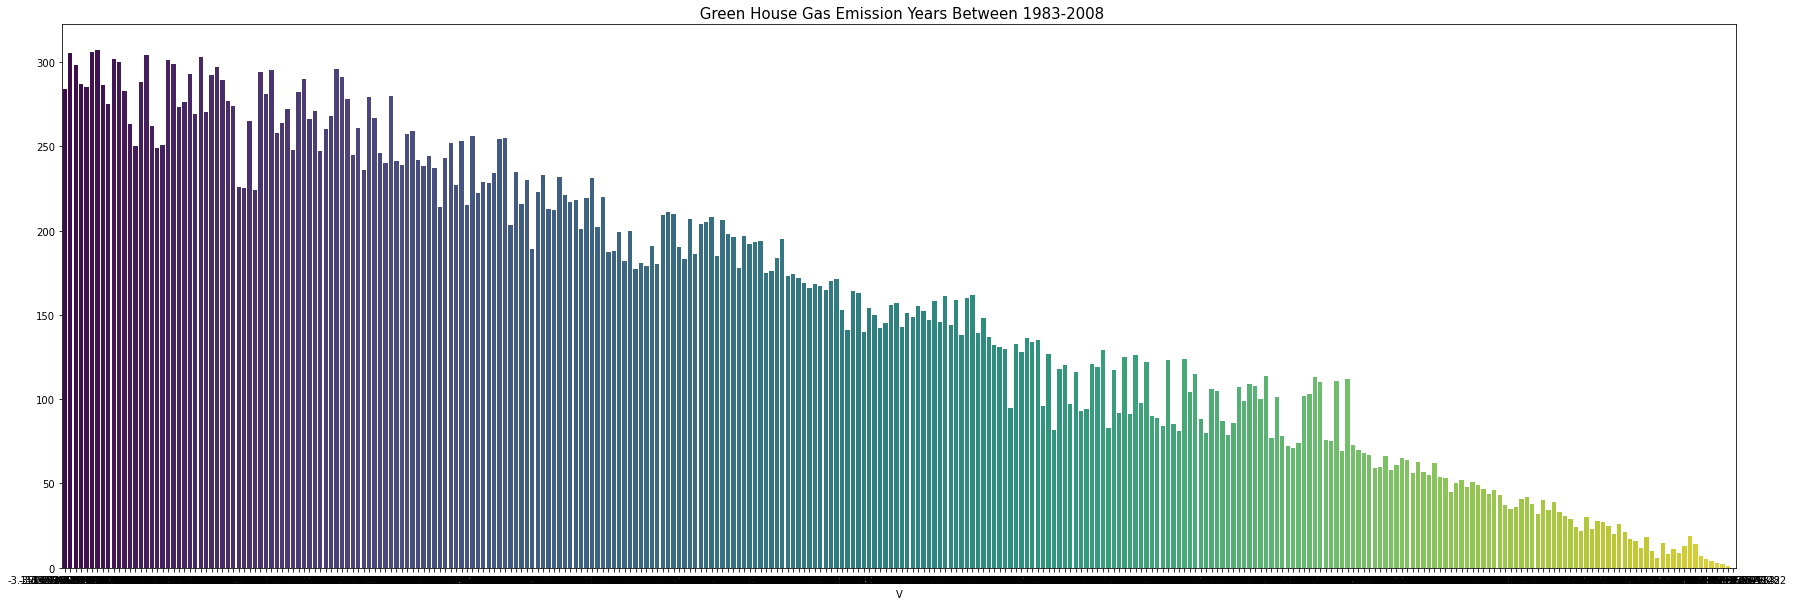

In [18]:
plt.figure(figsize=(30,10))
plt.title(' Green House Gas Emission Years Between 1983-2008', fontsize=15)
plot = sns.barplot(data1.V, data1.index, palette='viridis')
#plt.bar_label(plot.containers[0],size=12)
plt.show()

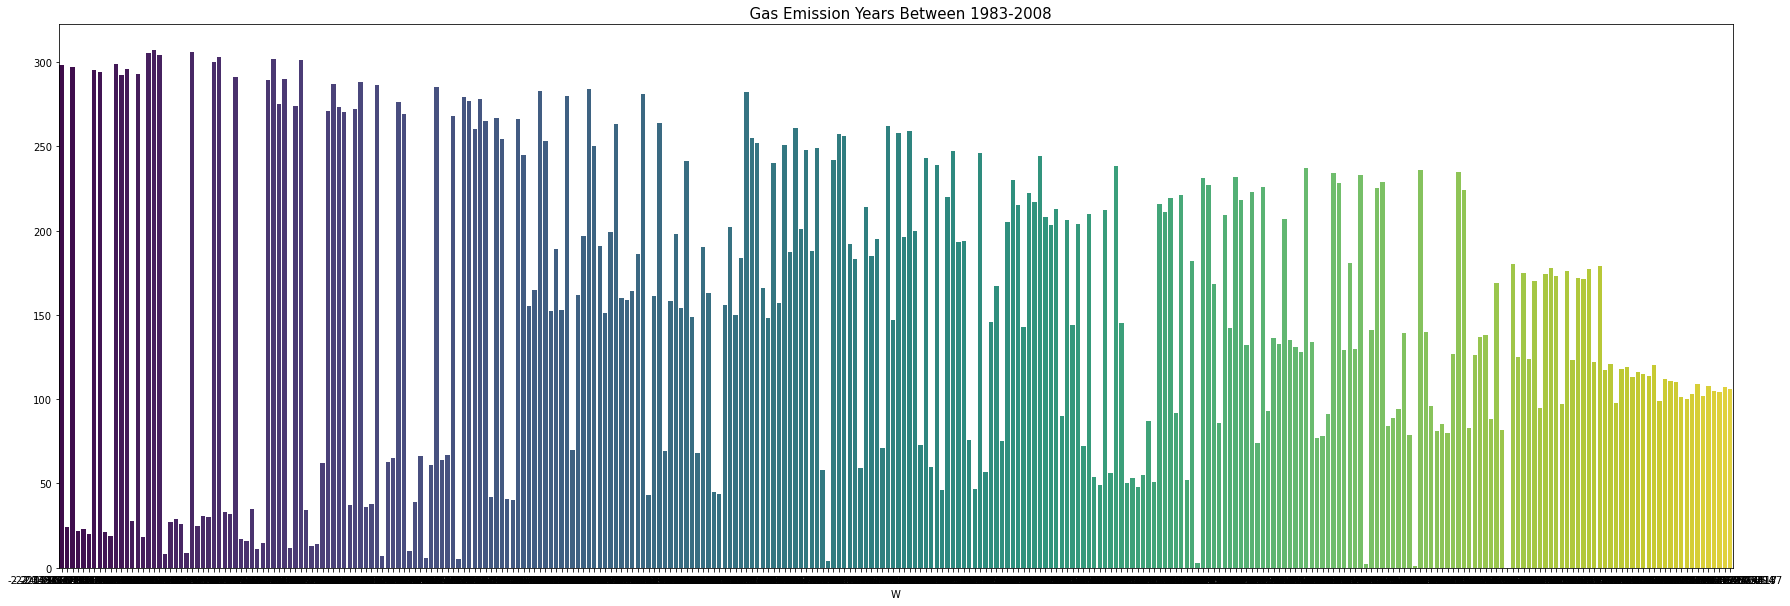

In [19]:
plt.figure(figsize=(30,10))
plt.title('  Gas Emission Years Between 1983-2008', fontsize=15)
plot = sns.barplot(data2.W, data1.index, palette='viridis')
#plt.bar_label(plot.containers[0],size=12)
plt.show()

<AxesSubplot:xlabel='V', ylabel='W'>

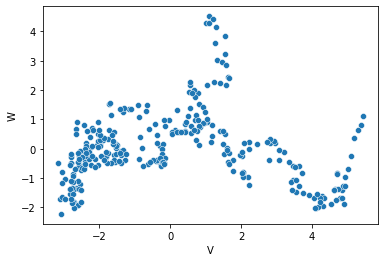

In [20]:
sns.scatterplot(x='V',y='W', data=df2)

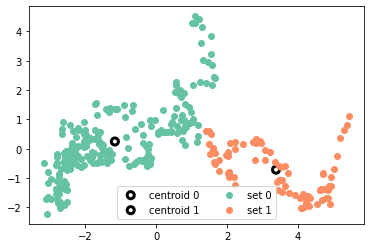

In [24]:
def kmeans(x, k, iterationNumber=100):
    idx = np.random.choice(len(x), k, replace=False)
    #Choosing centroids randomly
    centroids = x[idx, :]
    #Finding the distance between two data points using Euclidian distance from scipy.spatial.distance
    distances = cdist(x, centroids, 'euclidean')
    points = np.array([np.argmin(i) for i in distances])

    for _ in range(iterationNumber):
        centroids = []
        for idx in range(k):
            #Finding new centroids with taking the mean for every cluster and updating the center
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)  
        #New centroids
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    return points, centroids

df2 = df.set_axis(['V', 'W'], axis=1, inplace=False)
x = df2[['V', 'W']].to_numpy()

k = 2
points, centroids = kmeans(x, k)
#Ploting the data
colors = plt.cm.Set2.colors
for val, color in zip(range(k), colors):
    plt.scatter(centroids[val, 0], centroids[val, 1],facecolor='none', edgecolor='black', lw=3,
                s=50, label=f'centroid {val}')
for val, color in zip(range(k), colors):
    plt.scatter(x[points == val, 0], x[points == val, 1], color=color, label=f'set {val}')
plt.legend(ncol=2)
plt.show()

In [40]:
X=gh[['CO2','CH4']]
y=gh['Aerosols']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
len(X_train)

246

In [44]:
len(X_test)
#it choosess this dataset randomly

62

In [45]:
len(X)

308

In [46]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [47]:
clf.fit(X_train, y_train)

LinearRegression()

In [48]:
clf.predict(X_train)

array([ 0.0102348 ,  0.03262017,  0.02516139,  0.02559497, -0.00033681,
        0.02305053,  0.00660047,  0.01959804,  0.02225307,  0.02496578,
        0.01951191,  0.02443204,  0.01228266, -0.00043711,  0.00411679,
        0.01390554,  0.02338031,  0.00766887,  0.02073179,  0.02833356,
        0.02017106,  0.0298304 ,  0.00130929,  0.0079205 , -0.00317782,
        0.00165111,  0.02884335,  0.02214648,  0.01794157,  0.01056547,
        0.00475323,  0.00499603,  0.02217821,  0.02885318,  0.02999654,
        0.0093109 ,  0.02471651,  0.02318872,  0.01184407,  0.02219044,
        0.02517804,  0.0121803 ,  0.00053942,  0.01314567,  0.02440968,
        0.00994774,  0.01094407,  0.02384347,  0.02572994,  0.02699865,
        0.01503232,  0.02366371,  0.0090135 ,  0.02405671,  0.00285767,
       -0.00282571,  0.02497489,  0.03002631,  0.02314745,  0.01630721,
       -0.00034595,  0.02214293,  0.01702989,  0.00069093,  0.02580336,
        0.02560969,  0.01129625,  0.00511522,  0.01264176,  0.02

In [49]:
y_test

35     0.0147
111    0.1141
165    0.0057
277    0.0033
134    0.0179
        ...  
163    0.0061
98     0.0377
14     0.0282
219    0.0021
150    0.0086
Name: Aerosols, Length: 62, dtype: float64

In [50]:
clf.score(X_test,y_test)

0.1861245931312987